# Jamil Antoine Jabbour
# SCS 3030 Big Data Tools and Techniques: Mining Financial, Operational and Social Networks Data
# Assignment 04

In [3]:
import datetime
import pandas as pd
import pandas.io.data
import numpy as np 

import matplotlib.pyplot as plt 
%matplotlib inline 

### Collect the "Adjust Close" of the Stocks 

In [4]:
stock = ['AAPL','BBRY','LULU','AMZN']
stock_start = datetime.datetime(2011,9,1)
stock_end   = datetime.datetime(2016,8,1)
data = pd.io.data.get_data_yahoo(stock,stock_start,stock_end,interval='m')['Adj Close'] 
[data.head() ,data.tail()]

RemoteDataError: No data fetched using '_get_hist_yahoo'

### Plotting the times series of the stocks 

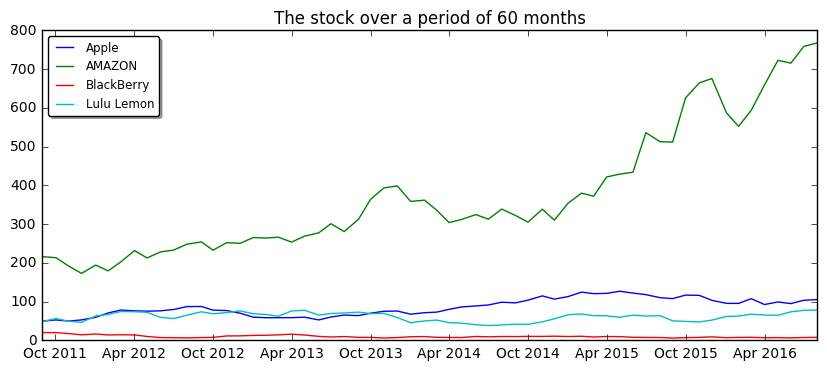

In [87]:
plt.figure(figsize=[10,4])
plt.plot(data['AAPL'],label='Apple')
plt.plot(data['AMZN'],label='AMAZON')
plt.plot(data['BBRY'],label='BlackBerry')
plt.plot(data['LULU'],label='Lulu Lemon')
plt.legend(loc=2,fontsize=8.5,shadow=True,fancybox=True)
plt.title('The stock over a period of 60 months')
plt.show()

### Plotting the auto corrolation 

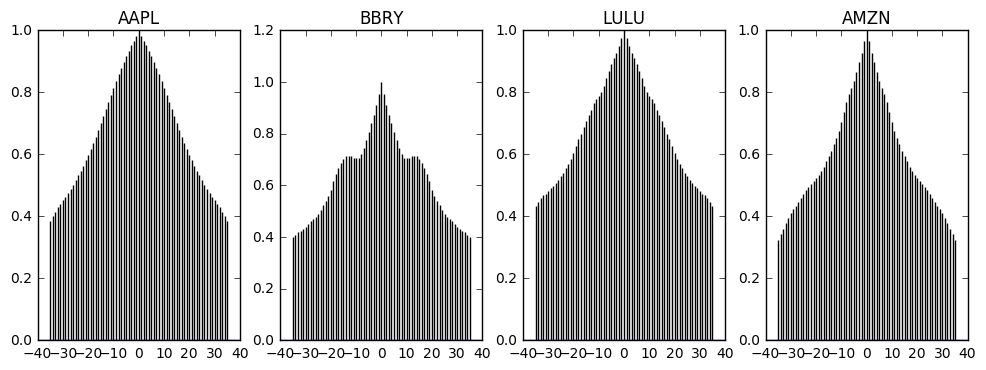

In [88]:
plt.figure(figsize=[12,4]) 
for i in range(len(stock)):
    ll = '14'+str(i+1)
    plt.subplot(ll)
    plt.acorr(data[stock[i]], usevlines=True, normed=True, maxlags=35)
    plt.title(stock[i])
plt.show()

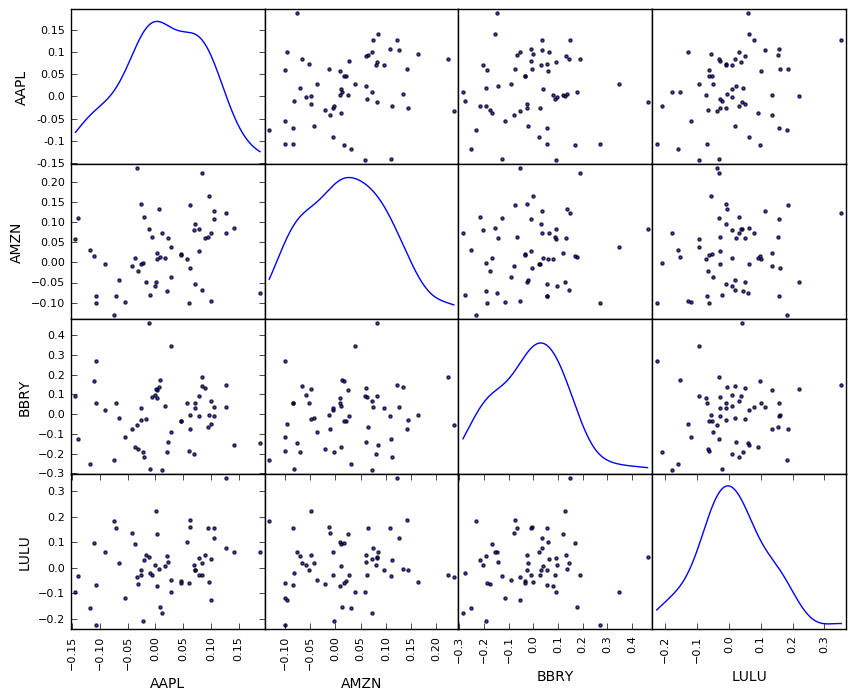

In [89]:
rets = data.pct_change()          # same as:  rect = (data/data.shift(1) -1)
pd.scatter_matrix(rets,diagonal='kde',alpha=.75, figsize=[10,8])
plt.show()

In [90]:
corrolation =rets.corr()

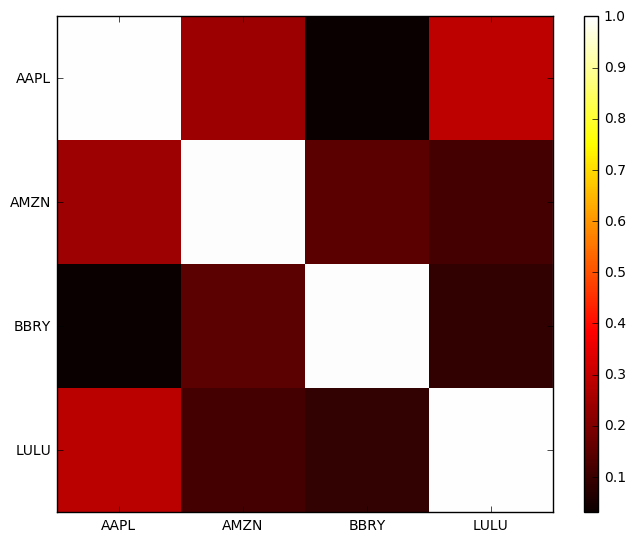

In [91]:
plt.figure(figsize=[8,8])
plt.imshow(corrolation, cmap='hot', interpolation='none')
plt.colorbar(shrink=.8,aspect=35,pad=.05)
plt.xticks(range(len(corrolation)), corrolation.columns)
plt.yticks(range(len(corrolation)), corrolation.columns)
plt.show()